In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np

In [2]:
df_raw = pd.read_csv("banco.csv", sep=",")
df_raw.head()

,ID,Sexo,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor,SaldoDevedor
0,1,0,26,0,0,2471.51,0.00,0.00,0,0.00
1,2,1,25,1,1,2781.90,4172.85,2781.90,0,0.00
2,3,0,29,0,0,2567.38,0.00,0.00,0,0.00
3,4,1,29,1,0,3329.50,4994.24,0.00,0,0.00
4,5,1,19,0,1,2074.08,0.00,2074.08,1,5887.33


In [3]:
df_main = df_raw.copy()
df_main.set_index("ID", inplace=True)
df_main.head()

,Sexo,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor,SaldoDevedor
ID,,,,,,,,,
1,0,26,0,0,2471.51,0.00,0.00,0,0.00
2,1,25,1,1,2781.90,4172.85,2781.90,0,0.00
3,0,29,0,0,2567.38,0.00,0.00,0,0.00
4,1,29,1,0,3329.50,4994.24,0.00,0,0.00
5,1,19,0,1,2074.08,0.00,2074.08,1,5887.33


In [4]:
corr = df_main.iloc[:,0:9].corr()
corr

,Sexo,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor,SaldoDevedor
Sexo,1.000000,0.073960,0.139096,0.380367,0.034367,0.132693,0.429791,0.035179,0.086579
Idade,0.073960,1.000000,-0.007367,0.011483,0.347913,0.040663,0.122553,0.079325,0.044605
CartaodeCredito,0.139096,-0.007367,1.000000,0.069972,-0.027010,0.749404,0.072509,-0.012646,0.219048
ChequeEspecial,0.380367,0.011483,0.069972,1.000000,0.050069,0.082751,0.693787,0.003600,0.150747
Renda,0.034367,0.347913,-0.027010,0.050069,1.000000,0.061695,0.165164,0.095072,0.051354
LimiteCartaodeCredito,0.132693,0.040663,0.749404,0.082751,0.061695,1.000000,0.097535,-0.018373,0.262825
LimiteChequeEspecial,0.429791,0.122553,0.072509,0.693787,0.165164,0.097535,1.000000,0.068906,0.188059
Devedor,0.035179,0.079325,-0.012646,0.003600,0.095072,-0.018373,0.068906,1.000000,0.672649
SaldoDevedor,0.086579,0.044605,0.219048,0.150747,0.051354,0.262825,0.188059,0.672649,1.000000


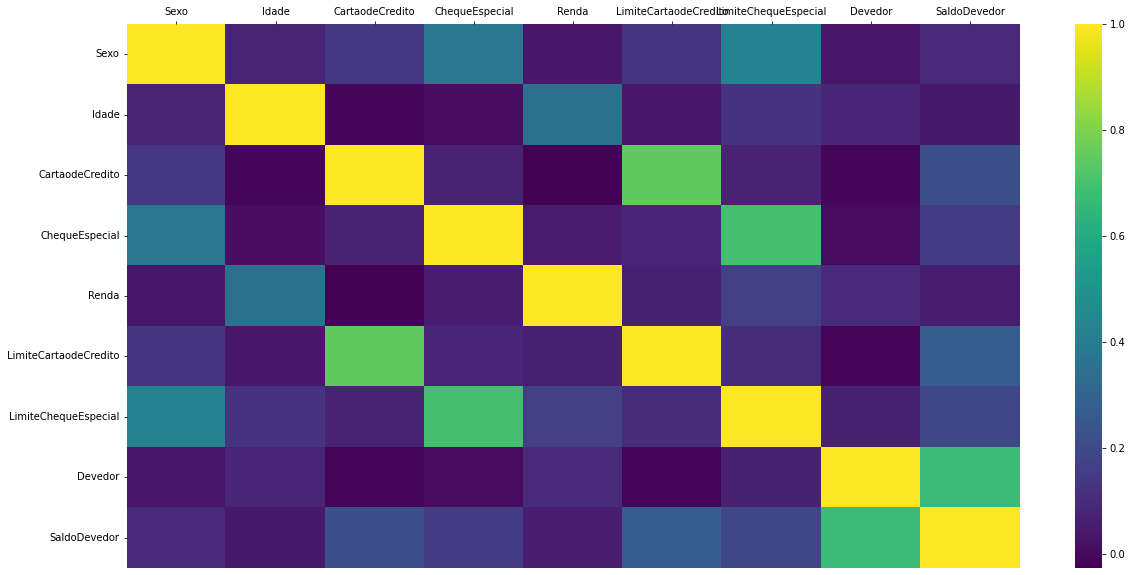

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, vmax=1., square=False, cmap="viridis").xaxis.tick_top()

In [6]:
X = np.matrix(df_main.iloc[:,0:9])
S = np.cov(np.transpose(X))
np.diagonal(S)

array([2.31399355e-01, 4.71849922e+01, 2.48146716e-01, 2.42453707e-01,
       4.70984617e+05, 3.82826363e+06, 2.02036163e+06, 2.22518173e-01,
       2.84970097e+07])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca

PCA(n_components=8)

In [8]:
pca.fit(X)

PCA(n_components=8)

In [9]:
pca.components_[0,:]

array([8.66528113e-06, 6.09255735e-05, 2.28795188e-05, 1.48305654e-05,
       7.19782086e-03, 1.09373582e-01, 5.38793408e-02, 5.82446511e-05,
       9.92513284e-01])

In [10]:
pca.explained_variance_ratio_
np.round(pca.explained_variance_ratio_,2)

array([0.83, 0.1 , 0.06, 0.01, 0.  , 0.  , 0.  , 0.  ])

In [11]:
pca.explained_variance_ratio_.cumsum()

array([0.82944037, 0.93100886, 0.98697299, 0.9999988 , 0.99999998,
       0.99999999, 0.99999999, 1.        ])

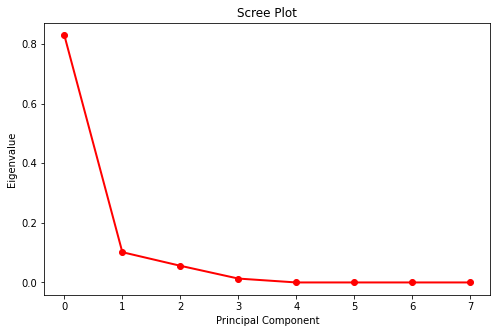

In [12]:
fig = plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [13]:
pca.transform(X)

array([[-2.81829973e+03, -1.78205786e+03, -1.15854938e+03, ...,
        -1.72267060e-01, -9.25762857e-02,  2.17211371e-02],
       [-2.20977912e+03,  2.56224643e+03,  1.29162986e+03, ...,
         4.27598034e-01, -7.95373361e-02,  3.00386488e-02],
       [-2.81760949e+03, -1.77978909e+03, -1.14917903e+03, ...,
        -1.71432864e-01, -1.13403394e-01,  2.95222415e-02],
       ...,
       [ 6.84916372e+03, -6.22874359e+00,  8.04396859e+02, ...,
        -3.49759142e-01, -1.42045027e-01,  2.04278716e-01],
       [-2.35919043e+03,  7.32273179e+02,  2.58628855e+03, ...,
        -1.19901212e-01,  7.31131620e-01, -1.64660938e-01],
       [ 1.58656763e+03,  1.64374221e+03, -1.98582752e+01, ...,
        -3.10250593e-01, -5.36527327e-02, -2.40011742e-01]])

In [14]:
pca = PCA(n_components=3)
pca.fit(X)

pca.components_

array([[ 8.66528113e-06,  6.09255735e-05,  2.28795188e-05,
         1.48305654e-05,  7.19782086e-03,  1.09373582e-01,
         5.38793408e-02,  5.82446511e-05,  9.92513284e-01],
       [ 3.40130010e-05,  1.36401222e-04,  1.86941731e-04,
         1.97894954e-05,  2.36607373e-02,  9.90584114e-01,
         7.31159306e-02, -5.78592071e-05, -1.13301745e-01],
       [ 1.39637949e-04,  6.29864381e-04, -1.82362330e-05,
         2.35207300e-04,  9.77203775e-02, -8.06891688e-02,
         9.90888199e-01, -1.39060197e-05, -4.56080093e-02]])

In [15]:
np.round(pca.components_[0],3)

array([0.   , 0.   , 0.   , 0.   , 0.007, 0.109, 0.054, 0.   , 0.993])

In [16]:
df_pca = df_main.copy()
PCA1 = pca.transform(X)[:,0]
PCA2 = pca.transform(X)[:,1]
PCA3 = pca.transform(X)[:,2]
df_pca['PCA1'] = PCA1
df_pca['PCA2'] = PCA2
df_pca['PCA3'] = PCA3
df_pca.head()

,Sexo,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor,SaldoDevedor,PCA1,PCA2,PCA3
ID,,,,,,,,,,,,
1,0,26,0,0,2471.51,0.00,0.00,0,0.00,-2818.299730,-1782.057856,-1158.549376
2,1,25,1,1,2781.90,4172.85,2781.90,0,0.00,-2209.779122,2562.246431,1291.629862
3,0,29,0,0,2567.38,0.00,0.00,0,0.00,-2817.609492,-1779.789092,-1149.179034
4,1,29,1,0,3329.50,4994.24,0.00,0,0.00,-2265.885938,3185.458254,-1477.685333
5,1,19,0,1,2074.08,0.00,2074.08,1,5887.33,3133.842593,-2306.858773,589.281560


In [17]:
df_pca.sort_values(by='PCA2',ascending=False)

,Sexo,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor,SaldoDevedor,PCA1,PCA2,PCA3
ID,,,,,,,,,,,,
622,1,43,1,1,4556.52,6834.77,4556.52,0,0.00,-1810.245547,5370.846361,3008.719639
712,0,40,1,1,4476.05,6714.07,4476.05,0,0.00,-1828.362009,5243.494796,2930.856461
1839,1,39,1,1,4315.50,6473.25,4315.50,0,0.00,-1864.507346,4989.404734,2775.511429
1982,0,43,1,0,4500.65,6750.97,0.00,0,0.00,-2065.315513,4953.359232,-1504.980518
1952,1,37,1,1,4122.32,6183.48,4122.32,0,0.00,-1907.999537,4683.667586,2588.594065
...,...,...,...,...,...,...,...,...,...,...,...,...
546,1,36,0,1,3827.11,0.00,3827.11,1,13490.78,10787.438857,-2998.688202,2150.877543
1061,1,34,0,1,3339.41,0.00,3339.41,1,13201.65,10470.686037,-3013.127522,1633.148524
857,1,35,0,1,3572.92,0.00,3572.92,1,13553.55,10834.213651,-3030.399950,1871.300684


In [46]:
from t2h import T2Hotelling

In [44]:
df_amostra = df_main.sample(500)

In [47]:
mu0 = [0.3, 30, 0.48, 0.43, 3000, 2100, 1240, 0.28, 2150]
n=len(df_amostra)
p=len(df_amostra.columns)

T2Hotelling(df_amostra, mu0, n, p)

Rejeitamos H0
Valor da estatística 53.44618537764819
valor p 9.412030099742452e-08


In [29]:
df_amostra.mean()

Sexo                        0.39200
Idade                      30.69400
CartaodeCredito             0.47200
ChequeEspecial              0.39000
Renda                    3100.82404
LimiteCartaodeCredito    2045.12596
LimiteChequeEspecial     1429.58188
Devedor                     0.33600
SaldoDevedor             2768.11986
dtype: float64

In [24]:
Xbarra = df_amostra.mean()
mu0 = [0.3, 30, 0.48, 0.43, 3000, 2100, 1240, 0.28, 2150]
S_inv = np.linalg.inv(df_amostra.cov())
n = len(df_amostra)

Teste = n*np.array(Xbarra-mu0).T.dot(S_inv).dot(np.array(Xbarra-mu0)) < (n-1) * p / (n-p) * f.ppf(0.95, p , n-p, loc=0, scale=1)

print('Resultado: mu0 está na região de confiança de mu') if(Teste) else print('Resultado: mu0 não está na região de confiança de mu')

Resultado: mu0 está na região de confiança de mu


In [25]:
df_amostra[df_amostra['Sexo']==0].mean()

Sexo                        0.000000
Idade                      30.409091
CartaodeCredito             0.439394
ChequeEspecial              0.393939
Renda                    3211.138939
LimiteCartaodeCredito    2014.641667
LimiteChequeEspecial     1209.228030
Devedor                     0.212121
SaldoDevedor              606.789848
dtype: float64

In [26]:
df_amostra[df_amostra['Sexo']==1].mean()

Sexo                        1.000000
Idade                      32.000000
CartaodeCredito             0.529412
ChequeEspecial              0.588235
Renda                    3098.854412
LimiteCartaodeCredito    2114.275882
LimiteChequeEspecial     2043.483824
Devedor                     0.411765
SaldoDevedor             4510.075588
dtype: float64

In [33]:
S1 = df_amostra.iloc[:,1:8][df_amostra['Sexo']==1].cov()
n1 = len(df_amostra[df_amostra['Sexo']==1])
Xbarra1 = df_amostra[df_amostra['Sexo']==1].mean()
print("n1",n1)
S1

n1 196


,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor
Idade,53.609288,-0.488540,-0.107352,1783.367935,-2.479760e+01,6.909056e+02,0.340738
CartaodeCredito,-0.488540,0.250340,0.004082,-33.502272,5.923860e+02,1.597019e+01,-0.003454
ChequeEspecial,-0.107352,0.004082,0.237441,-7.946932,2.910644e+01,2.631235e+02,-0.019649
Renda,1783.367935,-33.502272,-7.946932,536906.586028,4.695824e+04,1.470703e+05,22.084532
LimiteCartaodeCredito,-24.797599,592.385990,29.106439,46958.238321,3.530303e+06,6.996960e+04,-69.803389
LimiteChequeEspecial,690.905597,15.970187,263.123543,147070.262851,6.996960e+04,1.565603e+06,50.031016
Devedor,0.340738,-0.003454,-0.019649,22.084532,-6.980339e+01,5.003102e+01,0.232208


In [40]:
S2 = df_amostra.iloc[:,1:8][df_amostra['Sexo']==0].cov()
n2 = len(df_amostra[df_amostra['Sexo']==0])
Xbarra2 = df_amostra[df_amostra['Sexo']==0].mean()
print("n2",n2)
S2

n2 304


,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor
Idade,37.780268,-0.297551,-0.260118,1504.680636,7.549563e+02,2.721677e+02,0.254343
CartaodeCredito,-0.297551,0.246483,0.002866,-12.348762,8.196642e+02,4.524588e+00,-0.000391
ChequeEspecial,-0.260118,0.002866,0.184775,21.324078,1.840730e+01,4.276992e+02,0.011182
Renda,1504.680636,-12.348762,21.324078,401385.901283,9.409438e+04,1.782454e+05,29.285172
LimiteCartaodeCredito,754.956270,819.664239,18.407299,94094.380596,4.074566e+06,1.014268e+05,18.891724
LimiteChequeEspecial,272.167653,4.524588,427.699221,178245.381318,1.014268e+05,1.716347e+06,92.706457
Devedor,0.254343,-0.000391,0.011182,29.285172,1.889172e+01,9.270646e+01,0.217985


In [41]:
S_pooled = ((n1-1)*S1 + (n2-1)*S2)/(n1+n2-2)
S_pooled

,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor
Idade,43.978378,-0.372336,-0.200300,1613.805180,4.496310e+02,4.361313e+02,0.288172
CartaodeCredito,-0.372336,0.247993,0.003342,-20.631763,7.306697e+02,9.006299e+00,-0.001590
ChequeEspecial,-0.200300,0.003342,0.205397,9.862538,2.259672e+01,3.632569e+02,-0.000891
Renda,1613.805180,-20.631763,9.862538,454451.229647,7.563746e+04,1.660383e+05,26.465644
LimiteCartaodeCredito,449.630960,730.669744,22.596721,75637.457416,3.861451e+06,8.910921e+04,-15.838290
LimiteChequeEspecial,436.131306,9.006299,363.256938,166038.256617,8.910921e+04,1.657321e+06,75.996194
Devedor,0.288172,-0.001590,-0.000891,26.465644,-1.583829e+01,7.599619e+01,0.223554


In [49]:
from t2h_duble import T2Hotelling_duas_amostras

In [50]:
df1 = df_amostra.iloc[:,1:8][df_amostra['Sexo']==1]
df2 = df_amostra.iloc[:,1:8][df_amostra['Sexo']==0]

delta0 = [0,0,0,0,0,0,0]

T2Hotelling_duas_amostras(df1,df2,delta0)

Não rejeitamos H0
Valor da estatística 0.002537066820663694
valor p 0.9999999999939094
